<a href="https://colab.research.google.com/github/harnalashok/deeplearning/blob/main/Tabular_data_with_fastai_QuickStart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 02nd June, 2023
# github deeplearning repo
# Ref: https://docs.fast.ai/tutorial.tabular.html
#      https://confusedcoders.com/data-science/deep-learning/how-to-apply-deep-learning-on-tabular-data-with-fastai
#      https://www.martinalarcon.org/2018-12-31-b-water-pumps/
# Good Kaggle notebook:
#      https://www.kaggle.com/code/rohan1506/fastai-tutorial-detailed
# Good fastai totorial:
#      https://walkwithfastai.com/tab.clas.binary
#      https://walkwithfastai.com/tab.stats
# Also see
#      https://www.mdpi.com/2078-2489/11/2/108
# Objectives:
#           a) Using fastai to preprocess data
#           b) fastai for developing model
#           c) fast ai for making data ready for other libraries

# Tabular models
To get help on fastai functons use `doc()`.<br>
Reference See [here](https://docs.fast.ai/tutorial.tabular.html)<br>
What are DataLoaders? See [here](https://dirk-kalmbach.medium.com/datablock-and-dataloaders-in-fastai-d5aa7ae560e5) and [here](https://muttoni.github.io/blog/machine-learning/fastai/2020/12/26/datablocks-vs-dataloaders.html)

In [7]:
# 0.0
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [8]:
# To see prettier help using doc()
#  Also for creating python packages
!pip install nbdev

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.7 MB/s eta 0:00:00


## Call libraries

In [9]:
# 1.0 Call libraries:
%reset -f
from fastai.tabular import *

# For FillMissing, Categorify, Normalize, untar_data
from fastai.tabular.all import *

## Get data

Pathlib module contains useful functions to perform file-related tasks. Pathlib provides a more readable and easier way to build up paths by representing filesystem paths as proper objects and enables us to write code that is portable across platforms.

In [10]:
# 1.1 untar_data will download data (if not already downloaded)
#      to /root/.fastai/data/adult_sample

path = untar_data(URLs.ADULT_SAMPLE)
path
print("\n=====\n")
path.ls()
print("\n=====\n")
type(path)

Path('/root/.fastai/data/adult_sample')


=====



(#3) [Path('/root/.fastai/data/adult_sample/adult.csv'),Path('/root/.fastai/data/adult_sample/export.pkl'),Path('/root/.fastai/data/adult_sample/models')]


=====



pathlib.PosixPath

## Read our data

In [ ]:
# 3.0 Read the downloaded dataset 
df = pd.read_csv(path / 'adult.csv')
df.head()

In [12]:
# 3.1
df.shape   # (32561, 15)

(32561, 15)

In [ ]:
# Get no of unique values in each:
for i in df.columns:
  n = df[i].nunique()
  print(f"No of unique values in {i} are {n}")

## Data types & Data processing

In [14]:
# 3.2 Define some constants:

dep_var = 'salary'    # target
cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race']
cont_names = ['age', 'fnlwgt', 'education-num']


## Some expts
How do `FillMissing` and `Categorify` behave

Processes to operate on data. Refer below for API:<br>
[FillMissing](https://docs.fast.ai/tabular.core.html#fillmissing) will fill the missing values in the continuous variables by the median of existing values (you can choose a specific value if you prefer)<br>
[Categorify](https://docs.fast.ai/tabular.core.html#categorify): Transform the categorical variables to something similar to pd.Categorical<br>
[Normalize](https://docs.fast.ai/data.transforms.html#normalize) will normalize the continuous variables (subtract the mean and divide by the std)<br>


### FillMissing and Categorigy
While filling missing values in a continouos column, a new column is also created.

In [15]:
# 4.0
from numpy import NaN
df1 = pd.DataFrame({'a':[NaN,1,2.1,2.4,3.1, NaN]})
to = TabularPandas(df1,
                   [FillMissing, Categorify],   # Try first FillMissing only
                   cont_names = ['a']           # 'a' is a cont column
                   )

to.xs.head(7)

,a_na,a
0,2,2.25
1,1,1.00
2,1,2.10
3,1,2.40
4,1,3.10
5,2,2.25


In [16]:
# 4.0.1 Change fillstrategy

na_dict={'a': 7.0}
fm = FillMissing(fill_strategy=FillStrategy.constant, fill_vals= na_dict)

In [17]:
# 4.0
from numpy import NaN

df1 = pd.DataFrame({'a':[NaN,1,2.1,2.4,3.1, NaN]})
to = TabularPandas(df1,
                   [fm, Categorify],   # Try first FillMissing only
                   cont_names = ['a']           # 'a' is a cont column
                   )

to.xs.head(7)

,a_na,a
0,2,7.0
1,1,1.0
2,1,2.1
3,1,2.4
4,1,3.1
5,2,7.0


### Categorifying a categorical column
NaNs are given a label encoding of 0

In [18]:
# 4.1
from numpy import NaN
df1 = pd.DataFrame({'a':[NaN,"a","b","a","c", NaN]})
to = TabularPandas(df1,
                   [FillMissing,Categorify],    # FillMissing has no efefct
                   cat_names = ['a']
                   )


to1 = TabularPandas(df1,
                    [Categorify, FillMissing],  # FillMissing has no effect
                    cat_names = ['a'] 
                    ) 

# 4.1.1
to.xs.head(10)
to1.xs.head(10) 

,a
0,0
1,1
2,2
3,1
4,3
5,0


,a
0,0
1,1
2,2
3,1
4,3
5,0


In [19]:
# 4.1.1
from numpy import NaN
df1 = pd.DataFrame({'a':[NaN,"a","b","a","c", NaN]})
cat = Categorify()
to = TabularPandas(df1,
                   [FillMissing,cat],    # FillMissing has no efefct
                   cat_names = ['a']
                   )
# 4.1.1
to.xs.head(10)


,a
0,0
1,1
2,2
3,1
4,3
5,0


In [20]:
# 4.1.2 Categorical claas mapping
cat.classes

{'a': ['#na#', 'a', 'b', 'c']}

## Our data now

In [21]:
# 5.1 What all we need to do over this data
#  and in what sequence:

procs = [FillMissing, Categorify, Normalize]

In [22]:
# 5.2 Get two splits of data
# RandomSplitter() ==  https://docs.fast.ai/data.transforms.html#randomsplitter

# range_of() == list(range(len(x))) ==> A fastai function; See: https://fastcore.fast.ai/basics.html

splits = RandomSplitter(valid_pct=0.2)(range_of(df))

In [ ]:
# 5.3 This is what splits object is:
splits

((#26049) [7426,7177,30768,11549,1193,13492,20161,26413,24491,26933...],
 (#6512) [17330,6441,25564,26399,15327,13234,19201,17671,27757,25646...])

Transform pandas to a fastai data structure known as Tabular Pandas

In [23]:
# 5.4
to = TabularPandas(
                   df,
                   procs=  [FillMissing,Categorify, Normalize], # [Categorify, FillMissing,Normalize],
                   cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race'],
                   cont_names = ['age', 'fnlwgt', 'education-num'],
                   y_names='salary',
                   splits=splits
                   )

In [24]:
# 5.5
type(to)
print("\n=======\n")
type(to.xs)

fastai.tabular.core.TabularPandas

pandas.core.frame.DataFrame

In [ ]:
# 5.5.1 Train and valid dataset:
to.train
to.valid

## Pre-processed data

In [26]:
# 6.0
to.xs.head(5)

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num
30632,1,16,1,1,5,5,1,0.393730,0.021518,-0.030886
22876,5,13,5,12,2,5,1,2.663722,0.631339,1.529841
26774,6,12,3,5,1,5,1,0.027602,-0.365723,-0.421068
29668,5,12,5,13,5,5,1,-0.045624,0.256616,-0.421068
28307,5,2,1,2,5,5,1,0.466955,-0.874944,-1.201432


In [27]:
# 6.1 See now completely preprocessed data:

to.xs.iloc[:2]

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num
30632,1,16,1,1,5,5,1,0.393730,0.021518,-0.030886
22876,5,13,5,12,2,5,1,2.663722,0.631339,1.529841


In [ ]:
# 6.2
doc(to.dataloaders)

What are DataLoaders?<br>
DLs help you to investigate, clean, change and prepare you data before, during and after building your deep learning model.

In [ ]:
# 6.3 Build our DataLoaders now:

dls = to.dataloaders(bs=64)

## LEarn now

[Tabular Learner](https://docs.fast.ai/tabular.learner.html)

In [29]:
# 6.3 Build our DataLoaders now:

dls = to.dataloaders(bs=64)

In [30]:
# 7.0
#learn = tabular_learner(dls, [30,50,10], metrics=accuracy)
learn = tabular_learner(dls,   metrics=[accuracy])

In [ ]:
# To get help on tabular_learner
doc(tabular_learner)

In [ ]:
doc(learn.lr_find)

SuggestedLRs(valley=0.002511886414140463)

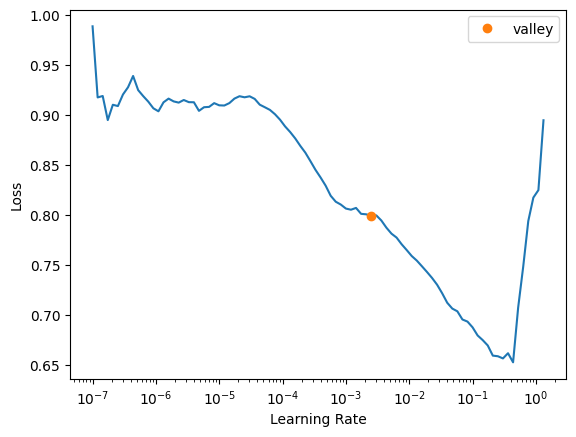

In [31]:
# 7.1 select the appropriate learning rate
#       we typically find the point where the slope is steepest
learn.lr_find()

See [this StackOverflow answer](https://stackoverflow.com/a/62986041) as to why the suggested lr is not 0.1 but 0.002.

SuggestedLRs(valley=0.0010000000474974513)

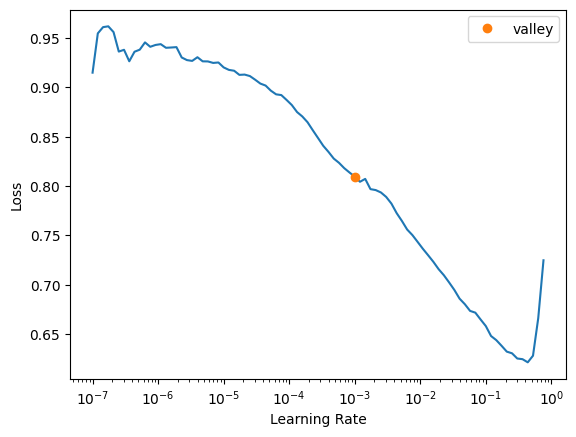

In [32]:
# 7.2
lr_steepest = learn.lr_find()

lr_steepest

## Our model

## Train the model

In [33]:
# 9.0 Less the batch_size (bs), more the time:
#     On slice(), see this discussion:
#      https://forums.fast.ai/t/what-does-the-slice-lr-mean-in-fit-one-cycle/60896/6

learn.fit_one_cycle(10, slice(2e-03, 2e-02))

epoch,train_loss,valid_loss,accuracy,time
0,0.371450,0.374600,0.820792,00:04
1,0.384707,0.367084,0.825553,00:05
2,0.375076,0.356704,0.836149,00:05
3,0.350010,0.352396,0.838759,00:04
4,0.353505,0.350857,0.837070,00:05
5,0.367679,0.352295,0.840448,00:04
6,0.360387,0.348165,0.841370,00:04
7,0.345944,0.346581,0.840909,00:05
8,0.347907,0.346111,0.840909,00:04
9,0.356561,0.346855,0.840295,00:05


## Make predictions

### Directly from a DataFrame

In [34]:
# 10.0 We can then have a look at some predictions:
learn.show_results()

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,salary,salary_pred
0,5.0,16.0,6.0,2.0,5.0,5.0,1.0,0.466955,1.504861,-0.030886,0.0,0.0
1,5.0,12.0,3.0,15.0,1.0,5.0,1.0,-0.338526,1.810273,-0.421068,0.0,0.0
2,3.0,16.0,3.0,9.0,1.0,5.0,1.0,-0.118849,-1.500471,-0.030886,0.0,0.0
3,5.0,10.0,5.0,11.0,2.0,5.0,1.0,-0.851105,2.101481,1.139659,0.0,0.0
4,1.0,12.0,3.0,0.0,1.0,5.0,1.0,1.858241,-1.511799,-0.421068,0.0,0.0
5,5.0,16.0,7.0,13.0,2.0,5.0,1.0,1.052760,0.062140,-0.030886,0.0,0.0
6,6.0,16.0,3.0,13.0,1.0,5.0,1.0,0.320504,-0.159616,-0.030886,1.0,1.0
7,7.0,10.0,3.0,6.0,1.0,5.0,1.0,0.540181,-1.526398,1.139659,1.0,0.0
8,8.0,11.0,3.0,11.0,1.0,2.0,1.0,0.100827,2.993906,2.310204,1.0,1.0


In [35]:
# 10.1 Make prediction for one row:
row, clas, probs = learn.predict(df.iloc[0])

In [36]:
# 10.2 Show result of one row
row.show()

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,salary
0,Private,Assoc-acdm,Married-civ-spouse,#na#,Wife,White,False,49.0,101319.998637,12.0,>=50k


In [37]:
# 10.3 Other information
clas, probs

(tensor(1), tensor([0.4968, 0.5032]))

### From Data Loader object

To get prediction on a new dataframe, you can use the test_dl method of the DataLoaders. That dataframe does not need to have the dependent variable in its column. About `test_dl` object , see [here](https://muellerzr.github.io/fastblog/2020/08/10/testdl.html)

In [38]:
# 11.0
test_df = df.copy()
test_df.drop(['salary'], axis=1, inplace=True)

In [39]:
# 11.1 Transform test_df exactly in the manner
#      train was done using test_dl
dl = learn.dls.test_dl(test_df)

In [40]:
# 11.2 Get predictions now:

learn.get_preds(dl=dl)

(tensor([[0.4968, 0.5032],
         [0.4092, 0.5908],
         [0.9880, 0.0120],
         ...,
         [0.5663, 0.4337],
         [0.7416, 0.2584],
         [0.7701, 0.2299]]),
 None)

### Get prediction from any arbitrary data

In [41]:
# 12.0
test_data = {
    'age': [49], 
    'workclass': ['Private'], 
    'fnlwgt': [101320],
    'education': ['Assoc-acdm'], 
    'education-num': [12.0],
    'marital-status': ['Married-civ-spouse'], 
    'occupation': [''],
    'relationship': ['Wife'],
    'race': ['White'],
}

# 12.1
input = pd.DataFrame(test_data)

In [42]:
# 12.2
tdl = learn.dls.test_dl(input)

In [43]:
# 12.3
learn.get_preds(dl=tdl)

(tensor([[0.8011, 0.1989]]), None)

## USing fastai pre-processing with sklearn and other libraries

As mentioned earlier, `TabularPandas` is a powerful and easy preprocessing tool for tabular data. Integration with libraries such as `Random Forests` and `XGBoost` requires only one extra step, that the .dataloaders call did for us. Let’s look at our `to` object again. Its values are stored in a DataFrame like object, where we can extract the `cats`, `conts`, `xs` and `ys` if we want to:

In [44]:
# 13.0
to.xs[:3]

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num
30632,1,16,1,1,5,5,1,0.393730,0.021518,-0.030886
22876,5,13,5,12,2,5,1,2.663722,0.631339,1.529841
26774,6,12,3,5,1,5,1,0.027602,-0.365723,-0.421068


Now that everything is encoded, you can then send this off to `XGBoost` or `Random Forests` by extracting the train and validation sets and their values:

In [45]:
# 13.1 Get split and pre-processed data:

X_train, y_train = to.train.xs, to.train.ys.values.ravel()
X_test, y_test = to.valid.xs, to.valid.ys.values.ravel()

In [46]:
# 13.2
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(26049, 10)

(6512, 10)

(26049,)

(6512,)

In [ ]:
###########################